In [4]:
import pandas as pd
%matplotlib inline
#matplotlib qt would create graphs that popup and can be saved


In [9]:
#Read in both parts of the Titanic dataset
my_df_1 = pd.read_csv("/Users/jason/Documents/pyplay/Titanic.csv")
my_df_2 = pd.read_csv("/Users/jason/Documents/pyplay/Titanic_II.csv")

print(my_df_2.shape)
print(my_df_1.shape)

(418, 12)
(891, 12)


In [10]:
# Get column names of your dataframe

my_df_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Merge the two dataframes into the same dataframe using append

merged_df = my_df_1.append(my_df_2)
merged_df.shape

(1309, 12)

In [16]:
#Merge the two dataframes into the same dataframe using concat (this method of merging dataframes allows you to join
# df's with unequal rows or columns and in different orientations, e.g. top to bottom, left to right)

df_list = [my_df_1,my_df_2]
merged_df_2 = pd.concat(df_list, axis = 0)
merged_df_2.shape
merged_df_2.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
# Write out the merged dataframe as a .csv file

merged_df.to_csv("/Users/jason/Documents/pyplay/merged_data.csv",index = False)


In [17]:
# How can we define our own function and make new columns with derived data

def child_age(x):
    if x < 12:
        return "Child"
    else:
        return "Adult"
    
#"Status" is a new column in your data frame to which we "applied" the output of the function "child_age" for each row.
merged_df["Status"] = merged_df["Age"].apply(child_age)
#NOTE: This is not a "for loop" because pandas is not using an internal for loop. Instead it is mapping the function to 
#all rows of the dataframe and evaluating the "if" statement simultaneously.
merged_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [18]:
# Pandas has inbuilt statistics
# How to make summary statistics of a column
merged_df["Fare"].describe()
#The count is short by one row which has a missing value for "Fare"

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [19]:
# Creating a new dataframe by joining lists of data
# The relationships from these lists are established by index # and thus need to be in order.
Names = ["Jason","Laura","Johnson","Meuller","Anna"]

City = ["Seattle","San Francisco", "Portland", "Santa Cruz", "Athens"]

State = ["Washington", "California", "Oregon", "California", "Georgia"]

Income = [70000,80000,105000,45000,90000]

#the pd.DataFrame module takes a dictionary as an input using the key as a column header 
#and values froms lists as rows.
our_df = pd.DataFrame({"Name": Names, "City": City, "State": State, "Annual Income": Income})

our_df.head()

,Annual Income,City,Name,State
0,70000,Seattle,Jason,Washington
1,80000,San Francisco,Laura,California
2,105000,Portland,Johnson,Oregon
3,45000,Santa Cruz,Meuller,California
4,90000,Athens,Anna,Georgia


In [20]:
# Find and replace in our dataframe
# inplace = False means don't change the original data frame
rep_df = our_df.replace(to_replace = "California",value = "CA",inplace = False)

rep_df.head()

,Annual Income,City,Name,State
0,70000,Seattle,Jason,Washington
1,80000,San Francisco,Laura,CA
2,105000,Portland,Johnson,Oregon
3,45000,Santa Cruz,Meuller,CA
4,90000,Athens,Anna,Georgia


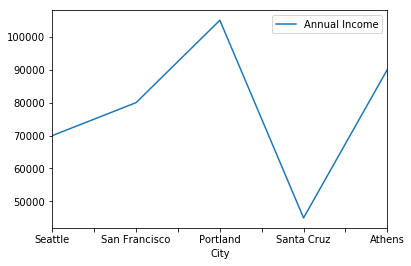

In [21]:
#pandas has some inbuilt graphing functions
rep_df.plot(x = "City", y = "Annual Income", kind = "line")

# Drill Time !

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

In [22]:
def fare_expense(f):
    if f < 10:
        return "inexpensive"
    else:
        return "expensive"

merged_df["Fare_status"] = merged_df["Fare"].apply(fare_expense)

merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive


Get all column names of your new dataframe

In [32]:
merged_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Status',
       'Fare_status'],
      dtype='object')

Write this dataframe to disk as a csv file

In [23]:
merged_df.to_csv("/Users/jason/Documents/pyplay/merged_data2.csv",index = False)

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

In [24]:
merged_df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

What is the average age of passengers who travelled first class ?

In [35]:
select_df = merged_df[merged_df["Pclass"] == 1]
select_df["Age"].describe()

count    284.000000
mean      39.159930
std       14.548028
min        0.920000
25%       28.000000
50%       39.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

What is the average fare paid by passengers who travelled first class ?

Replace male by M and female by F in the dataframe

In [26]:
rep1_df = merged_df.replace(to_replace = "male",value = "M",inplace = False)
rep2_df = rep1_df.replace(to_replace = "female",value = "F",inplace = False)

rep2_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare_status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive


Scatter plot fares against passenger names

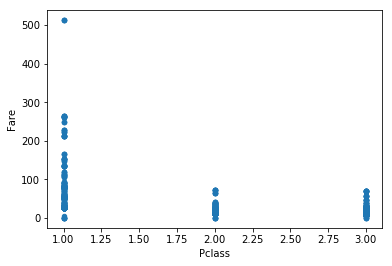

In [30]:
merged_df.plot(x = "Pclass", y = "Fare", kind = "scatter")